In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames
import chardet
with open('D:\\Documents\\loan_dataset.csv', 'rb') as f:
    result = chardet.detect(f.read())

loan_dataset = pd.read_csv("D:\\Documents\\loan_dataset.csv",encoding=result['encoding'],skiprows=1)
print("The loan dataset has {} samples with {} features.".format(*loan_dataset.shape))

C:\Users\User\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The loan dataset has 42542 samples with 111 features.


In [54]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(loan_dataset, test_size=0.2)

In [55]:
test.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
10350,833971,1043707.0,35000.0,35000.0,34975.00,60 months,18.39%,896.22,E,E2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
20619,657172,840459.0,13250.0,13250.0,13250.00,60 months,13.43%,304.41,C,C3,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
32062,486993,620731.0,17000.0,17000.0,14875.00,36 months,9.88%,547.58,B,B1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3796,1012777,1239930.0,12000.0,12000.0,12000.00,36 months,11.71%,396.92,B,B3,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
39958,605634,776945.0,12000.0,12000.0,11782.13,36 months,9.25%,383.00,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [56]:

train.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
17098,722110,916893.0,20000.0,20000.0,19975.0,60 months,19.36%,522.79,F,F4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
26555,568472,731314.0,6250.0,6250.0,6250.0,36 months,7.14%,193.39,A,A3,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
22050,635524,814122.0,22000.0,22000.0,21500.0,36 months,6.17%,670.98,A,A3,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2926,1029687,1259074.0,15000.0,15000.0,15000.0,36 months,14.27%,514.64,C,C2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
22864,623531,799112.0,19500.0,19500.0,19500.0,60 months,17.06%,485.26,E,E4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [57]:
train.iloc[0]

id                                                                           722110
member_id                                                                    916893
loan_amnt                                                                     20000
funded_amnt                                                                   20000
funded_amnt_inv                                                               19975
term                                                                      60 months
int_rate                                                                     19.36%
installment                                                                  522.79
grade                                                                             F
sub_grade                                                                        F4
emp_title                                                            Kroger Company
emp_length                                                                10

In [58]:
train.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.402800e+04,34028.000000,34028.000000,34028.000000,34028.000000,3.402400e+04,34028.000000,34006.000000,34006.000000,12504.000000,...,0.0,0.0,0.0,0.0,32913.000000,33946.000000,0.0,0.0,0.0,0.0
mean,8.257023e+05,11096.311126,10830.510168,10142.757619,323.006128,6.919401e+04,13.374909,0.150885,1.080427,35.044386,...,NaN,NaN,NaN,NaN,0.046425,0.000029,NaN,NaN,NaN,NaN
std,2.797965e+05,7401.172118,7140.885977,7131.110547,209.199635,6.639072e+04,6.713533,0.510752,1.523748,22.402298,...,NaN,NaN,NaN,NaN,0.211272,0.005428,NaN,NaN,NaN,NaN
min,7.047300e+04,500.000000,500.000000,0.000000,15.670000,2.000000e+03,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,6.385390e+05,5200.000000,5050.000000,4950.000000,165.602500,4.001700e+04,8.210000,0.000000,0.000000,17.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,8.255280e+05,9750.000000,9600.000000,8500.000000,277.980000,5.896400e+04,13.470000,0.000000,1.000000,33.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,1.034588e+06,15000.000000,15000.000000,14000.000000,427.872500,8.250000e+04,18.670000,0.000000,2.000000,51.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
max,1.313524e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,13.000000,32.000000,120.000000,...,NaN,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,NaN


In [59]:
train = train.drop(['desc', 'url'],axis=1)
test=test.drop(['desc','url'],axis=1)

In [60]:
train=train.dropna(thresh=len(train)/2,axis=1)
test=test.dropna(thresh=len(test)/2,axis=1)
test.iloc[0]

id                                         833971
member_id                             1.04371e+06
loan_amnt                                   35000
funded_amnt                                 35000
funded_amnt_inv                             34975
term                                    60 months
int_rate                                   18.39%
installment                                896.22
grade                                           E
sub_grade                                      E2
emp_title                                    TSYS
emp_length                              10+ years
home_ownership                           MORTGAGE
annual_inc                                  53000
verification_status                      Verified
issue_d                                    Aug-11
loan_status                           Charged Off
pymnt_plan                                      n
purpose                            small_business
title                         Small Business Loan


In [64]:
print(len(test.columns))
print(len(train.columns))

52
52


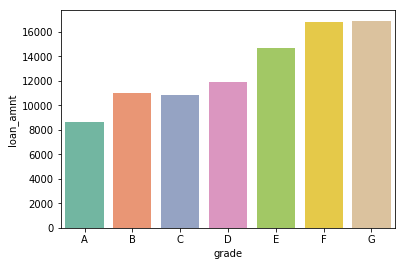

In [65]:
#lower the grade,higher loan amount issued
import seaborn as sns
df_copy=train
group = df_copy.groupby("grade").mean()
avg_loan = group['loan_amnt'].reset_index()
sns.barplot(x='grade', y='loan_amnt', data=avg_loan, palette='Set2')

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


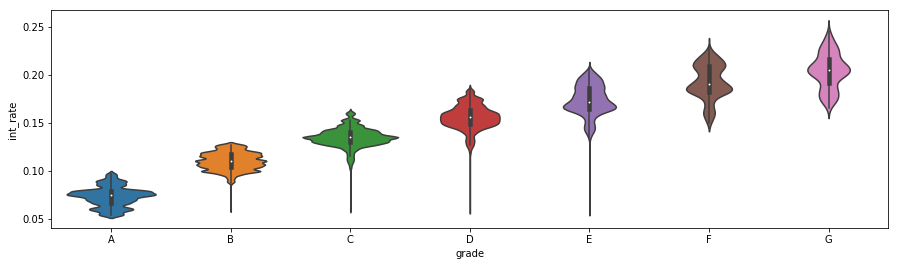

In [66]:
#converting interest in percent to float type(removing % symbol)
df_copy['int_rate'] = df_copy['int_rate'].str.rstrip('%').astype('float')/100.0
plt.subplots(figsize=(15,4))
sns.violinplot(x='grade', y='int_rate', data=df_copy,order="ABCDEFG")
#shows lower grades have higher interest rates

In [75]:
from sklearn.preprocessing import LabelEncoder
df_exp=pd.DataFrame()#create new dataset
labelencoder_X=LabelEncoder()
#df_copy[:,0] = labelencoder_X.fit_transform(df_copy[:,0])

for col_name in df_copy.columns:
    if(df_copy[col_name].dtype == 'object'):
        df_copy[col_name]= df_copy[col_name].astype('category')
        df_copy[col_name] = df_copy[col_name]
df_exp['annual_inc'] = df_copy['annual_inc']
df_exp['delinq_2yrs'] = df_copy['delinq_2yrs']
df_exp['dti'] = df_copy['dti']
#cat_columns = df_copy.select_dtypes(['object']).columns
#df_copy[cat_columns] = df_copy[cat_columns].apply(lambda x: x.cat.codes)#convert categoical data to numeric data
df_exp['emp_length'] = df_copy['emp_length'].cat.codes
df_exp['grade'] = df_copy['grade'].cat.codes
df_exp['home_ownership'] = df_copy['home_ownership'].cat.codes
df_exp['installment'] = df_copy['installment']
df_exp['int_rate'] = df_copy['int_rate']
df_exp['loan_amnt'] = df_copy['loan_amnt']
df_exp['loan_status'] = df_copy['loan_status'].cat.codes
df_exp['purpose'] = df_copy['purpose'].cat.codes
df_exp['sub_grade'] = df_copy['sub_grade'].cat.codes
#df_exp['term'] = categorize(df_copy['term'])
df_exp['acc_now_delinq'] = df_copy['acc_now_delinq']
len(df_exp.columns)
df_exp.head()

,annual_inc,delinq_2yrs,dti,emp_length,grade,home_ownership,installment,int_rate,loan_amnt,loan_status,purpose,sub_grade,acc_now_delinq
17098,55000.0,0.0,22.10,1,5,0,522.79,0.1936,20000.0,0,2,28,0.0
26555,43000.0,0.0,12.89,7,0,0,193.39,0.0714,6250.0,0,11,2,0.0
22050,90996.0,0.0,17.46,9,0,0,670.98,0.0617,22000.0,5,2,2,0.0
2926,31200.0,0.0,5.54,4,2,0,514.64,0.1427,15000.0,5,2,11,0.0
22864,53200.0,0.0,16.20,5,4,0,485.26,0.1706,19500.0,0,2,23,0.0


In [76]:
len(train.columns)

52

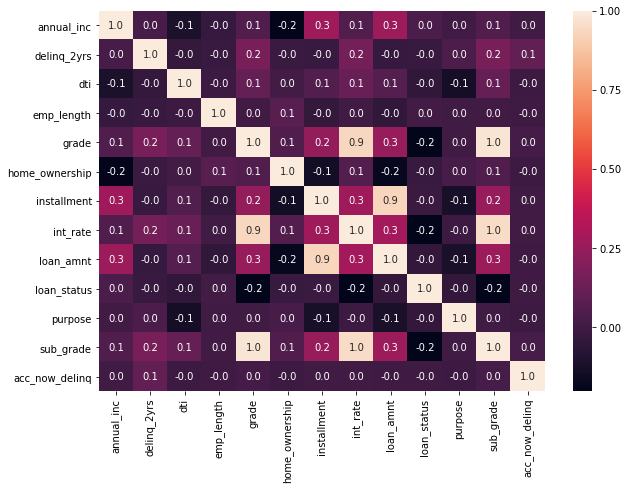

In [176]:
 plt.figure(figsize=(10,7))
# plt.matshow(df_exp.corr())
# plt.show()
# calculate the correlation matrix
corr = df_exp.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True,fmt='.1f')

In [78]:
len(train.columns)

52

In [79]:
#issue_d,is data about the month the loan was funded, this means a future information, we remove it
train = train.drop(['issue_d','zip_code'], axis =1)
test=test.drop(['issue_d','zip_code'], axis =1)

In [80]:
#grsde is hihly correlated with interst and they depend on each other;recurring thus removed
train = train.drop(['id', 'member_id', 'funded_amnt', 'funded_amnt_inv', 
                              'grade', 'sub_grade', 'emp_title'], axis =1)
test = test.drop(['id', 'member_id', 'funded_amnt', 'funded_amnt_inv', 
                              'grade', 'sub_grade', 'emp_title'], axis =1)


In [82]:
#they tell how the repayment is going,again future values after loan is approved;and late fee is interest late again future data
train = train.drop(['out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
                              'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee'], axis =1)
test=test.drop(['out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
                              'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee'], axis =1)

In [83]:
print(len(test.columns))
print(len(train.columns))

36
36


In [84]:
# last_pymnt_d and last_pmyny_amnt are the end repayment/last payment received, which means we cannot know that in advance
#recoveries-post charge off gross recovery again about futre
train = train.drop(['recoveries', 'collection_recovery_fee', 
                              'last_pymnt_d', 'last_pymnt_amnt'], axis =1)
test=test.drop(['recoveries', 'collection_recovery_fee', 
                              'last_pymnt_d', 'last_pymnt_amnt'], axis =1)

In [85]:
train.shape

(34033, 32)

In [86]:
#target column-we want to predict the loan status which can take many values (9) in total.
train['loan_status'].value_counts()

Fully Paid                                             27302
Charged Off                                             4497
Does not meet the credit policy. Status:Fully Paid      1583
Does not meet the credit policy. Status:Charged Off      616
Current                                                   14
Late (31-120 days)                                         7
In Grace Period                                            7
Late (16-30 days)                                          1
Default                                                    1
Name: loan_status, dtype: int64

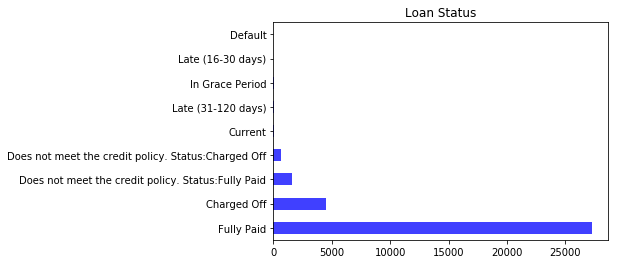

In [87]:
#plot
train['loan_status'].value_counts().plot(kind= 'barh', color = 'blue', title = 'Loan Status', alpha = 0.75)
plt.show()

In [89]:
#only considering 2 vales for classification;removing rest
train = train[(train['loan_status'] == "Fully Paid") | (train['loan_status'] == "Charged Off")]
test=test[(test['loan_status'] == "Fully Paid") | (test['loan_status'] == "Charged Off")]

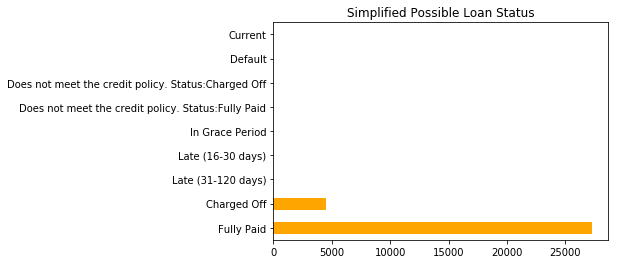

In [90]:
#final plot of loan status
train['loan_status'].value_counts().plot(kind= 'barh', color = 'orange', title = 'Simplified Possible Loan Status')
plt.show()

In [92]:
train.shape# we have removed all rows where status is apart from fully charge or charged off

(31799, 32)

In [95]:

#convert categorical to numeic;loan_status is object type so first convert to category type
train['loan_status']= train['loan_status'].astype('category')

train['loan_status'] = train['loan_status'].cat.codes
train['loan_status'].value_counts()

1    27302
0     4497
Name: loan_status, dtype: int64

In [96]:
test['loan_status']= test['loan_status'].astype('category')

test['loan_status'] = test['loan_status'].cat.codes
test['loan_status'].value_counts()

1    6783
0    1165
Name: loan_status, dtype: int64

In [97]:
train.shape

(31799, 32)

In [98]:
orig_columns = train.columns
drop_columns = []
for col in orig_columns:
    col_series = train[col].dropna().unique()
    if len(col_series) == 1:
        drop_columns.append(col)
train = train.drop(drop_columns, axis = 1)
test=test.drop(drop_columns,axis=1)
drop_columns

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [99]:
null_counts = train.isnull().sum()
null_counts

loan_amnt                 0
term                      0
int_rate                  0
installment               0
emp_length              865
home_ownership            0
annual_inc                0
verification_status       0
loan_status               0
purpose                   0
title                     9
addr_state                0
dti                       0
delinq_2yrs               0
earliest_cr_line          0
inq_last_6mths            0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util               39
total_acc                 0
last_credit_pull_d        2
pub_rec_bankruptcies    573
dtype: int64

In [100]:
train = train.drop("pub_rec_bankruptcies", axis=1)
test = test.drop("pub_rec_bankruptcies", axis=1)
train = train.drop("emp_length", axis=1)
test = test.drop("emp_length", axis=1)

In [105]:
train.shape

(31799, 21)

In [106]:
print(train.dtypes.value_counts())

float64     11
category     1
category     1
category     1
category     1
int8         1
category     1
category     1
category     1
category     1
category     1
dtype: int64


In [108]:
object_columns_df = train.select_dtypes(include=["object"])
print(object_columns_df.iloc[0])

Series([], Name: 17098, dtype: float64)


In [109]:
#to check which columns can becategorical values to be encoded
columns = ['term','home_ownership','verification_status','addr_state','purpose','title']
for col in columns:
    print(train[col].value_counts())
    print('\n')

 36 months    23266
 60 months     8533
Name: term, dtype: int64


RENT        15122
MORTGAGE    14145
OWN          2451
OTHER          78
NONE            3
Name: home_ownership, dtype: int64


Not Verified       13490
Verified           10304
Source Verified     8005
Name: verification_status, dtype: int64


CA    5719
NY    3005
FL    2261
TX    2209
NJ    1472
PA    1240
IL    1238
VA    1171
GA    1131
MA    1080
OH     971
MD     854
AZ     699
WA     662
CO     642
NC     623
CT     579
MI     577
MO     557
MN     484
NV     399
SC     381
WI     359
AL     357
LA     349
OR     348
KY     252
OK     245
KS     218
UT     211
AR     192
DC     173
NM     154
RI     152
HI     144
WV     142
NH     127
DE      83
AK      70
MT      65
WY      64
SD      46
VT      46
MS      13
TN      13
IN       9
IA       4
ID       3
ME       3
NE       3
Name: addr_state, dtype: int64


debt_consolidation    14902
credit_card            4199
other                  3172
home_improvement      

In [120]:
#title and address not categorical;large values
categorical_dataset = train[["term","home_ownership","verification_status","purpose"]]
categorical_dataset_test=test[["term","home_ownership","verification_status","purpose"]]
categorical_dataset_test.shape

(7948, 4)

In [113]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

traincat = categorical_dataset.apply(encoder.fit_transform)
testcat=categorical_dataset_test.apply(encoder.fit_transform)
traincat

,term,home_ownership,verification_status,purpose
17098,1,0,2,2
26555,0,0,2,11
22050,0,0,2,2
2926,0,0,2,2
22864,1,0,2,2
38039,0,4,0,8
36634,0,0,2,9
27162,0,0,0,9
19688,1,0,2,2
29079,1,4,1,9


In [114]:
#dates h last and earliest wale-toh remove hoga and title and addr bhot zyaada and useless data
train = train.drop(["last_credit_pull_d", "earliest_cr_line", "addr_state", "title"], axis=1)
test=test.drop(["last_credit_pull_d", "earliest_cr_line", "addr_state", "title"], axis=1)
train["revol_util"] = train["revol_util"].str.rstrip("%").astype("float")
test["revol_util"]= test["revol_util"].str.rstrip("%").astype("float")

In [140]:
print(test.columns)

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'purpose', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc'],
      dtype='object')


In [142]:
X_traindf = train.select_dtypes(include=['float64','int64'])
classcol = pd.concat([X_traindf, traincat], axis=1).columns
#test set
test['int_rate']=test['int_rate'].str.rstrip('%').astype('float')/100.0
X_testdf=test.select_dtypes(include=['float64','int64'])

classcol_test = pd.concat([X_testdf, testcat], axis=1).columns
refclass = np.concatenate((X_traindf.values, traincat.values), axis=1)
print(refclass)
X=refclass
print(X_testdf.columns)

[[2.0000e+04 1.9360e-01 5.2279e+02 ... 0.0000e+00 2.0000e+00 2.0000e+00]
 [6.2500e+03 7.1400e-02 1.9339e+02 ... 0.0000e+00 2.0000e+00 1.1000e+01]
 [2.2000e+04 6.1700e-02 6.7098e+02 ... 0.0000e+00 2.0000e+00 2.0000e+00]
 ...
 [1.2000e+04 7.5100e-02 3.7333e+02 ... 0.0000e+00 0.0000e+00 9.0000e+00]
 [1.5000e+04 1.0250e-01 4.8578e+02 ... 0.0000e+00 2.0000e+00 1.0000e+00]
 [1.0000e+04 1.2420e-01 3.3416e+02 ... 4.0000e+00 1.0000e+00 1.0000e+00]]
Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc'],
      dtype='object')


In [143]:
X_testdf.columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc'],
      dtype='object')

In [118]:
X_traindf.columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc'],
      dtype='object')

In [144]:
df_train=pd.concat([traincat,X_traindf],axis=1)
df_test=pd.concat([testcat,X_testdf],axis=1)
df_train.columns

Index(['term', 'home_ownership', 'verification_status', 'purpose', 'loan_amnt',
       'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc'],
      dtype='object')

In [145]:
df_test.columns

Index(['term', 'home_ownership', 'verification_status', 'purpose', 'loan_amnt',
       'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc'],
      dtype='object')

In [123]:
df_train.head()


,term,home_ownership,verification_status,purpose,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
17098,1,0,2,2,20000.0,0.1936,522.79,55000.0,22.10,0.0,0.0,25.0,0.0,20762.0,51.1,41.0
26555,0,0,2,11,6250.0,0.0714,193.39,43000.0,12.89,0.0,1.0,7.0,0.0,41.0,0.2,53.0
22050,0,0,2,2,22000.0,0.0617,670.98,90996.0,17.46,0.0,1.0,12.0,0.0,17888.0,32.3,30.0
2926,0,0,2,2,15000.0,0.1427,514.64,31200.0,5.54,0.0,0.0,5.0,0.0,2373.0,23.1,7.0
22864,1,0,2,2,19500.0,0.1706,485.26,53200.0,16.20,0.0,0.0,8.0,0.0,23596.0,74.0,14.0


In [146]:
test.shape

(7948, 17)

In [125]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31799 entries, 17098 to 255
Data columns (total 17 columns):
loan_amnt              31799 non-null float64
term                   31799 non-null category
int_rate               31799 non-null float64
installment            31799 non-null float64
home_ownership         31799 non-null category
annual_inc             31799 non-null float64
verification_status    31799 non-null category
loan_status            31799 non-null int8
purpose                31799 non-null category
dti                    31799 non-null float64
delinq_2yrs            31799 non-null float64
inq_last_6mths         31799 non-null float64
open_acc               31799 non-null float64
pub_rec                31799 non-null float64
revol_bal              31799 non-null float64
revol_util             31760 non-null float64
total_acc              31799 non-null float64
dtypes: category(4), float64(12), int8(1)
memory usage: 4.6 MB


In [147]:
Y_train=train[['loan_status']]
Y_test=test[['loan_status']]
Y_test.shape

(7948, 1)

In [139]:
X_train_set=train.drop('loan_status',axis=1)
X_test_set=test.drop('loan_status',axis=1)
X_train_set.shape

(31799, 16)

In [128]:
df_train.isnull().sum()

term                    0
home_ownership          0
verification_status     0
purpose                 0
loan_amnt               0
int_rate                0
installment             0
annual_inc              0
dti                     0
delinq_2yrs             0
inq_last_6mths          0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util             39
total_acc               0
dtype: int64

In [148]:
df_train.fillna(df_train.mean(), inplace=True)
df_test.fillna(df_test.mean(),inplace=True)
df_test.shape

(7948, 16)

In [130]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from sklearn import tree

rfc = RandomForestClassifier(criterion='entropy',random_state=0);
rfc.fit(df_train,Y_train)
lgrc = LogisticRegression(n_jobs=-1, random_state=0)
lgrc.fit(df_train, Y_train);
svc = SVC(random_state=0)
svc.fit(df_train, Y_train)
y_pred_rfc=rfc.predict(df_train)
y_pred_svc=svc.predict(df_train)
y_pred_lgrc=lgrc.predict(df_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\log

In [52]:
y_pred_rfc

array([1, 0, 1, ..., 1, 1, 1], dtype=int8)

In [155]:
from sklearn import metrics
accuracy = metrics.accuracy_score(Y_test, rfc.predict(df_test))
confusion_matrix = metrics.confusion_matrix(Y_test, rfc.predict(df_test))
print('=========== Random Forest Model Evaluation ==========')
print()
classification = metrics.classification_report(Y_test, rfc.predict(df_test))
print("Model Accuracy:" "\n", accuracy)
print()
print("Classification report:" "\n\n",classification)
print()
print("Confusion matrix:" "\n", confusion_matrix)
print()

=========== Random Forest Model Evaluation ==========

Model Accuracy:
 0.8336688475088072

Classification report:

               precision    recall  f1-score   support

           0       0.28      0.09      0.13      1165
           1       0.86      0.96      0.91      6783

   micro avg       0.83      0.83      0.83      7948
   macro avg       0.57      0.52      0.52      7948
weighted avg       0.78      0.83      0.79      7948


Confusion matrix:
 [[ 101 1064]
 [ 258 6525]]



In [166]:
predictions = pd.Series(y_pred_rfc)

false_positive_filter = (predictions == 1) & (test['loan_status'] == 0)
false_positive = len(predictions[false_positive_filter])

true_positive_filter = (predictions == 1) & (test['loan_status'] == 1)
true_positive = len(predictions[true_positive_filter])

false_negative_filter = (predictions == 0) & (test['loan_status'] == 1)
false_negative = len(predictions[false_negative_filter])

true_negative_filter = (predictions == 0) & (test['loan_status'] == 0)
true_negative = len(predictions[true_negative_filter])

true_positive_rate = true_positive / (true_positive + false_negative)
false_positive_rate = false_positive / (false_positive + true_negative)

print(float(true_positive_rate)) 
print(float(false_positive_rate))


0.8624074074074074
0.8631138975966562


In [167]:
precision = float(true_positive)/float(true_positive + false_positive)
precision

0.8493525442276126

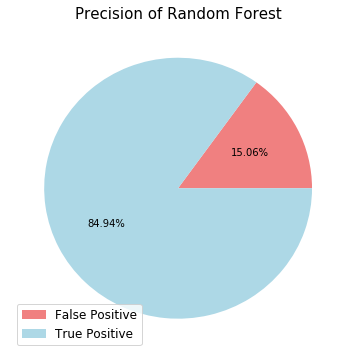

In [168]:
labels = 'False Positive', 'True Positive'
sizes = [1-precision, precision]
colors = ['lightcoral', 'lightblue'] 
# Plot
plt.figure(figsize=(6,6))
plt.pie(sizes, colors=colors, autopct='%1.2f%%')
plt.title('Precision of Random Forest', fontsize=15) 
plt.legend(labels, loc='lower left', fontsize=12)
plt.show()

In [173]:
from sklearn import metrics

print('=========== SVM Model Evaluation ==========')
accuracy = metrics.accuracy_score(Y_test, svc.predict(df_test))
confusion_matrix = metrics.confusion_matrix(Y_test, svc.predict(df_test))
print("Model Accuracy:" "\n", accuracy)
print()
print("Confusion matrix:" "\n", confusion_matrix)
print()
classification = metrics.classification_report(Y_test, svc.predict(df_test))
print("Classification report:" "\n",classification)




=========== SVM Model Evaluation ==========
Model Accuracy:
 0.853422244589834

Confusion matrix:
 [[   0 1165]
 [   0 6783]]

Classification report:

               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1165
           1       0.85      1.00      0.92      6783

   micro avg       0.85      0.85      0.85      7948
   macro avg       0.43      0.50      0.46      7948
weighted avg       0.73      0.85      0.79      7948



C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [169]:
predictions = pd.Series(y_pred_svc)

false_positive_filter = (predictions == 1) & (test['loan_status'] == 0)
false_positive = len(predictions[false_positive_filter])

true_positive_filter = (predictions == 1) & (test['loan_status'] == 1)
true_positive = len(predictions[true_positive_filter])

false_negative_filter = (predictions == 0) & (test['loan_status'] == 1)
false_negative = len(predictions[false_negative_filter])

true_negative_filter = (predictions == 0) & (test['loan_status'] == 0)
true_negative = len(predictions[true_negative_filter])

true_positive_rate = true_positive / (true_positive + false_negative)
false_positive_rate = false_positive / (false_positive + true_negative)

print(float(true_positive_rate)) 
print(float(false_positive_rate))

0.8561111111111112
0.8589341692789969


In [170]:
precision = float(true_positive)/float(true_positive + false_positive)
precision

0.8490358126721763

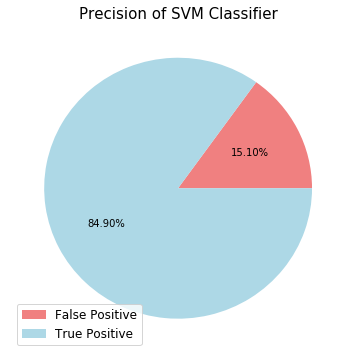

In [172]:
labels = 'False Positive', 'True Positive'
sizes = [1-precision, precision]
colors = ['lightcoral', 'lightblue'] 
# Plot
plt.figure(figsize=(6,6))
plt.pie(sizes, colors=colors, autopct='%1.2f%%')
plt.title('Precision of SVM Classifier', fontsize=15) 
plt.legend(labels, loc='lower left', fontsize=12)
plt.show()

In [177]:
print('=========== Logistic Regression Model Evaluation ==========')
print()
accuracy = metrics.accuracy_score(Y_test, lgrc.predict(df_test))
confusion_matrix = metrics.confusion_matrix(Y_test, lgrc.predict(df_test))
print("Model Accuracy:" "\n", accuracy)
print()
print("Confusion matrix:" "\n", confusion_matrix)
print()
classification = metrics.classification_report(Y_test, lgrc.predict(df_test))
print("Classification report:" "\n\n",classification)


=========== Logistic Regression Model Evaluation ==========

Model Accuracy:
 0.8530447911424258

Confusion matrix:
 [[   2 1163]
 [   5 6778]]

Classification report:

               precision    recall  f1-score   support

           0       0.29      0.00      0.00      1165
           1       0.85      1.00      0.92      6783

   micro avg       0.85      0.85      0.85      7948
   macro avg       0.57      0.50      0.46      7948
weighted avg       0.77      0.85      0.79      7948



In [179]:
predictions = pd.Series(y_pred_lgrc)

false_positive_filter = (predictions == 1) & (test['loan_status'] == 0)
false_positive = len(predictions[false_positive_filter])

true_positive_filter = (predictions == 1) & (test['loan_status'] == 1)
true_positive = len(predictions[true_positive_filter])

false_negative_filter = (predictions == 0) & (test['loan_status'] == 1)
false_negative = len(predictions[false_negative_filter])

true_negative_filter = (predictions == 0) & (test['loan_status'] == 0)
true_negative = len(predictions[true_negative_filter])

true_positive_rate = true_positive / (true_positive + false_negative)
false_positive_rate = false_positive / (false_positive + true_negative)

print(float(true_positive_rate)) 
print(float(false_positive_rate))

0.9990740740740741
0.9968652037617555


In [180]:
precision = float(true_positive)/float(true_positive + false_positive)
precision

0.849740116553788

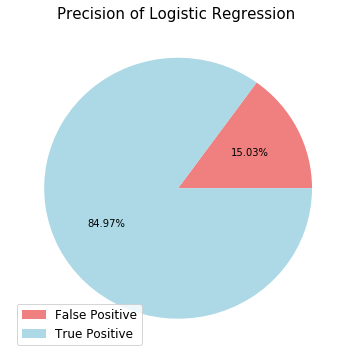

In [181]:
labels = 'False Positive', 'True Positive'
sizes = [1-precision, precision]
colors = ['lightcoral', 'lightblue'] 
# Plot
plt.figure(figsize=(6,6))
plt.pie(sizes, colors=colors, autopct='%1.2f%%')
plt.title('Precision of Logistic Regression ', fontsize=15) 
plt.legend(labels, loc='lower left', fontsize=12)
plt.show()